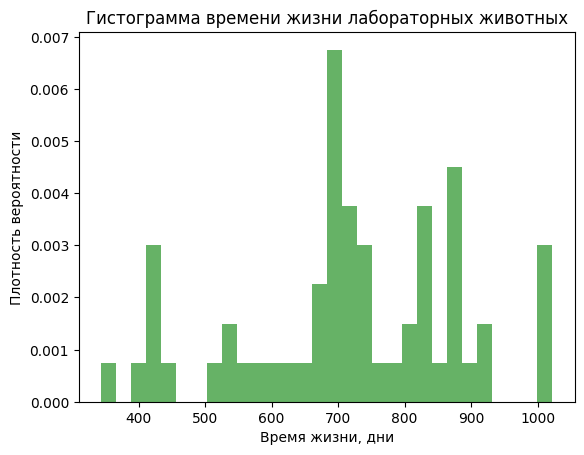

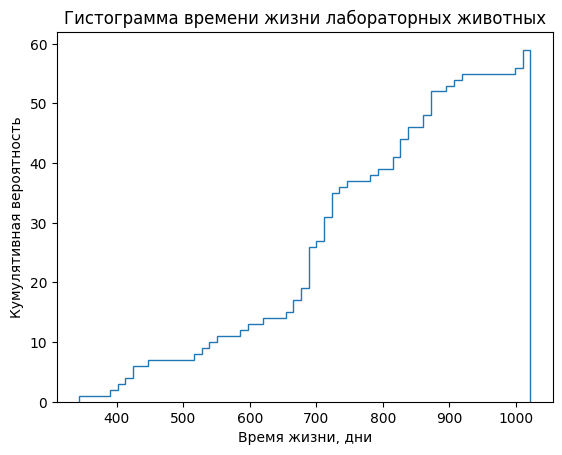

[[Model]]
    Model(gompertz)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 59
    # variables        = 3
    chi-square         = 4.91525424
    reduced chi-square = 0.08777240
    Akaike info crit   = -140.626444
    Bayesian info crit = -134.393832
    R-squared          = 0.00000000
##  Warning: uncertainties could not be estimated:
    a:  at initial value
    b:  at initial value
[[Variables]]
    a:  0.10000000 (init = 0.1)
    b:  0.10000000 (init = 0.1)
    c:  0.50847458 (init = 1)


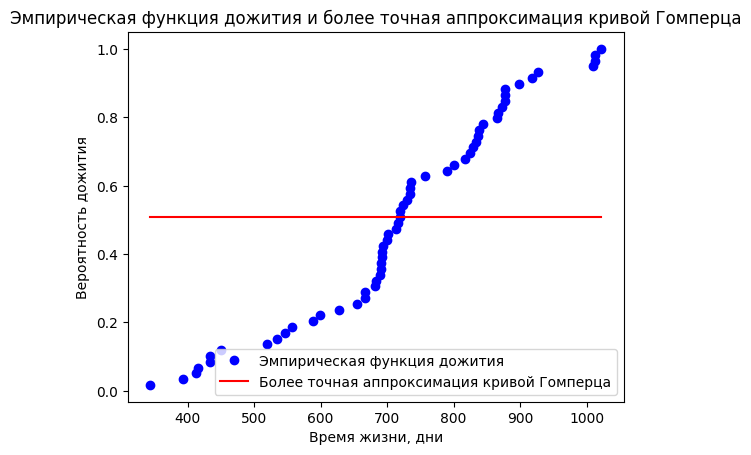

[[Model]]
    Model(gompertz)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 59
    # variables        = 3
    chi-square         = 4.91525424
    reduced chi-square = 0.08777240
    Akaike info crit   = -140.626444
    Bayesian info crit = -134.393832
    R-squared          = 0.00000000
##  Warning: uncertainties could not be estimated:
    a:  at initial value
    b:  at initial value
[[Variables]]
    a:  0.10000000 (init = 0.1)
    b:  0.10000000 (init = 0.1)
    c:  0.50847458 (init = 1)


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from lmfit import Model
from scipy.interpolate import UnivariateSpline


data = np.loadtxt("life_expectancy.txt")

# Эмпирическая функция дожития
data_sorted = np.sort(data)
y = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Условная функция дожития
def conditional_survival(t, data):
    return np.sum(data > t) / len(data)

plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Время жизни, дни')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма времени жизни лабораторных животных')
plt.show()

plt.hist(data, histtype='step', cumulative=True, bins=len(data))
plt.xlabel('Время жизни, дни')
plt.ylabel('Кумулятивная вероятность')
plt.title('Гистограмма времени жизни лабораторных животных')
plt.show()

#аппроксимация кривой Гомперца
def gompertz(t, a, b, c):
    return c * np.exp(-a * np.exp(-b * t))

# Оценка параметров с помощью lmfit
model = Model(gompertz)
params = model.make_params(a=0.1, b=0.1, c=1)  # Инициализация параметров
result = model.fit(y, t=data_sorted, params=params)

# Вывод результатов и график
print(result.fit_report())
plt.plot(data_sorted, y, 'bo', label='Эмпирическая функция дожития')
plt.plot(data_sorted, result.best_fit, 'r-', label='Более точная аппроксимация кривой Гомперца')
plt.xlabel('Время жизни, дни')
plt.ylabel('Вероятность дожития')
plt.legend()
plt.title('Эмпирическая функция дожития и более точная аппроксимация кривой Гомперца')
plt.show()

print(result.fit_report())

[[Model]]
    Model(gompertz)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 59
    # variables        = 2
    chi-square         = 19.1694915
    reduced chi-square = 0.33630687
    Akaike info crit   = -62.3288273
    Bayesian info crit = -58.1737524
    R-squared          = -2.90000000
##  Warning: uncertainties could not be estimated:
    a:  at initial value
    b:  at initial value
[[Variables]]
    a:  1.00000000 (init = 1)
    b:  1.00000000 (init = 1)


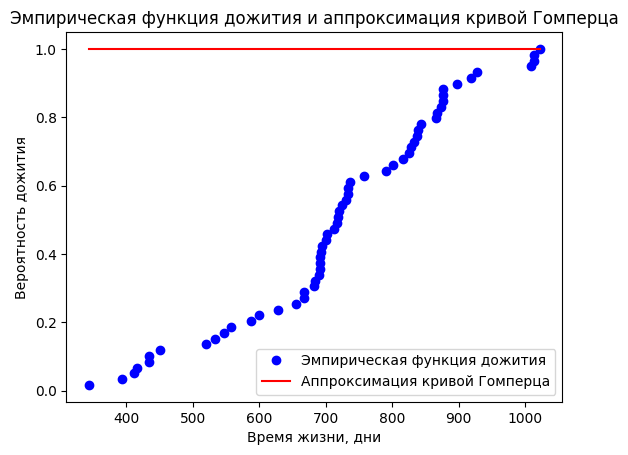

In [39]:
# Оценка параметров кривой Гомперца методом наименьших квадратов
#def gompertz(t, a, b, c):
    #return c * np.exp(-a * np.exp(-b * t))

#params, covariance = curve_fit(gompertz, data_sorted, y, maxfev=10000)

# Вывод результатов и график
print(result.fit_report())
plt.plot(data_sorted, y, 'bo', label='Эмпирическая функция дожития')
plt.plot(data_sorted, result.best_fit, 'r-', label='Аппроксимация кривой Гомперца')
plt.xlabel('Время жизни, дни')
plt.ylabel('Вероятность дожития')
plt.legend()
plt.title('Эмпирическая функция дожития и аппроксимация кривой Гомперца')
plt.show()


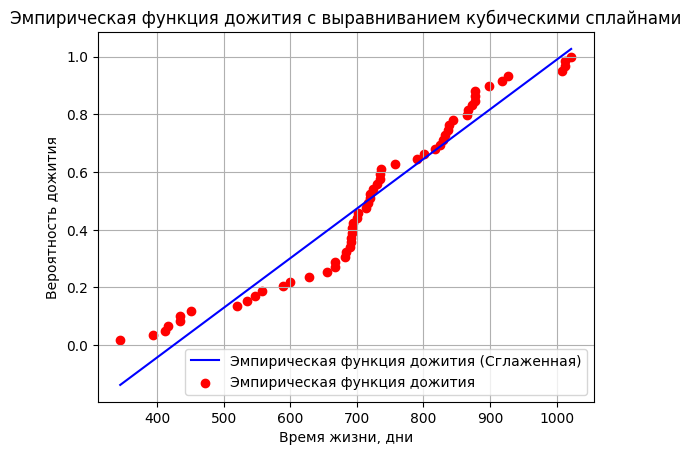

In [29]:

# Эмпирическая функция дожития
data_sorted = np.sort(data)
y = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Выравнивание кубическими сплайнами
spline = UnivariateSpline(data_sorted, y, k=1)
y_smooth = spline(data_sorted)

# График эмпирической функции дожития
plt.plot(data_sorted, y_smooth, label='Эмпирическая функция дожития (Сглаженная)', color='blue')
plt.scatter(data_sorted, y, label='Эмпирическая функция дожития', color='red')
plt.xlabel('Время жизни, дни')
plt.ylabel('Вероятность дожития')
plt.legend()
plt.grid(True)
plt.title('Эмпирическая функция дожития с выравниванием кубическими сплайнами')
plt.show()



[[Model]]
    Model(gompertz)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 59
    # variables        = 3
    chi-square         = 4.91525424
    reduced chi-square = 0.08777240
    Akaike info crit   = -140.626444
    Bayesian info crit = -134.393832
    R-squared          = 0.00000000
##  Warning: uncertainties could not be estimated:
    a:  at initial value
    b:  at initial value
[[Variables]]
    a:  0.10000000 (init = 0.1)
    b:  0.10000000 (init = 0.1)
    c:  0.50847458 (init = 1)


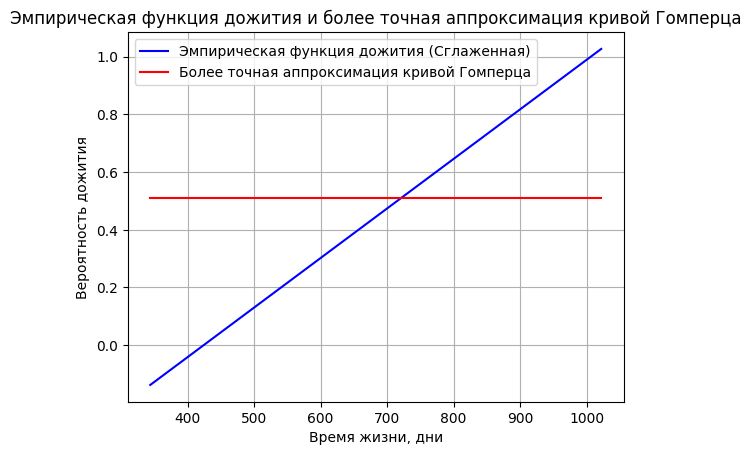

In [41]:
# Сглаживание кубическими сплайнами
spline = UnivariateSpline(data_sorted, y, k=1)
y_smooth = spline(data_sorted)

# Определение модели Гомперца для аппроксимации
def gompertz(t, a, b, c):
    return c * np.exp(-a * np.exp(-b * t))

model = Model(gompertz)

# Оценка параметров с помощью lmfit
params = model.make_params(a=0.1, b=0.1, c=1)
result = model.fit(y, t=data_sorted, params=params)

print(result.fit_report())
plt.plot(data_sorted, y_smooth, label='Эмпирическая функция дожития (Сглаженная)', color='blue')
plt.plot(data_sorted, result.best_fit, 'r-', label='Более точная аппроксимация кривой Гомперца')
plt.xlabel('Время жизни, дни')
plt.ylabel('Вероятность дожития')
plt.legend()
plt.title('Эмпирическая функция дожития и более точная аппроксимация кривой Гомперца')
plt.grid(True)
plt.show()

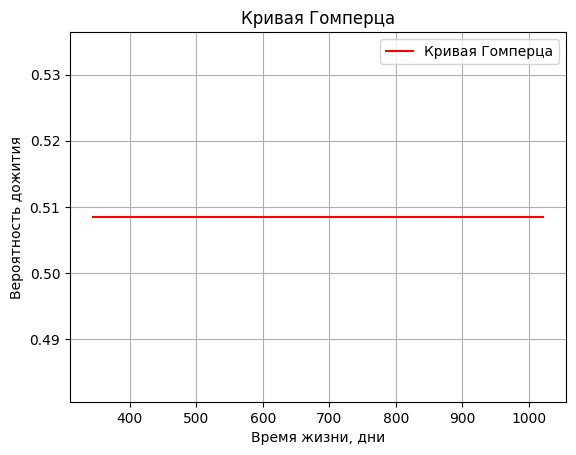

[[Model]]
    Model(gompertz)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 59
    # variables        = 3
    chi-square         = 4.91525424
    reduced chi-square = 0.08777240
    Akaike info crit   = -140.626444
    Bayesian info crit = -134.393832
    R-squared          = 0.00000000
##  Warning: uncertainties could not be estimated:
    a:  at initial value
    b:  at initial value
[[Variables]]
    a:  0.10000000 (init = 0.1)
    b:  0.10000000 (init = 0.1)
    c:  0.50847458 (init = 1)


In [33]:


# Определение модели Гомперца для аппроксимации
def gompertz(t, a, b, c):
    return c * np.exp(-a * np.exp(-b * t))

model = Model(gompertz)

# Оценка параметров с помощью lmfit
params = model.make_params(a=0.1, b=0.1, c=1)
result = model.fit(y, t=data_sorted, params=params)

# График кривой Гомперца
data_sorted = np.sort(data)
t = np.linspace(data_sorted[0], data_sorted[-1], 1000)
y_gompertz = result.eval(t=t)

plt.plot(t, y_gompertz, 'r-', label='Кривая Гомперца')
plt.xlabel('Время жизни, дни')
plt.ylabel('Вероятность дожития')
plt.legend()
plt.title('Кривая Гомперца')
plt.grid(True)
plt.show()

print(result.fit_report())